# Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
# custom classes created by us

from preprocess import PreProcess
from methods import mlmethods
from check_metrics import metrics
from visuals import vis



pob = PreProcess()
mob = mlmethods()
cmob = metrics()
vob = vis()

# Loading data

In [3]:
df = pd.read_csv('./Iris.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

# Preprocess data

In [4]:
# setting X and Y
X = df.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = df['Species']

## Preprocessing dataX

### Using min_max_scaler

In [5]:
pp1_dataX = pob.min_max_scaler(X)
pp1_dataX[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

### Using normalization

In [6]:
# code

### Using scaler

In [7]:
# code

## Preprocessing dataY

In [8]:
pp_dataY = pob.one_hot_encoders(df['Species'])
# we cannot feed catregorical values to classifier 
# hence converting 
# 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' to
# [1,0,0],[0,1,0],[0,0,1] 

pp_dataY.head()

Iris-setosa  Iris-versicolor  Iris-virginica
0            1                0               0
1            1                0               0
2            1                0               0
3            1                0               0
4            1                0               0

In [9]:
# converting dataframe to values
pp_dataY = pp_dataY.values

# Train Test Split

In [10]:
# As decision trees are not affected by scaling passing X
trainX, testX, trainY, testY = pob.train_test_spit(X,pp_dataY,test_size=0.35)

Train size: 97 
Test size:  53


In [11]:
treeClf = mob.decision_tree(criterion='gini',max_depth=3,random_state=48,splitter='best')
treeClf.fit(trainX,trainY)
pred_y = treeClf.predict(testX)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=48,
            splitter='best')


# Check Metrics

## Accuracy

In [12]:
cmob.accuracy(testY,pred_y)

0.9811320754716981

## Confusion Matrix

In [13]:
# code

# Visualisation

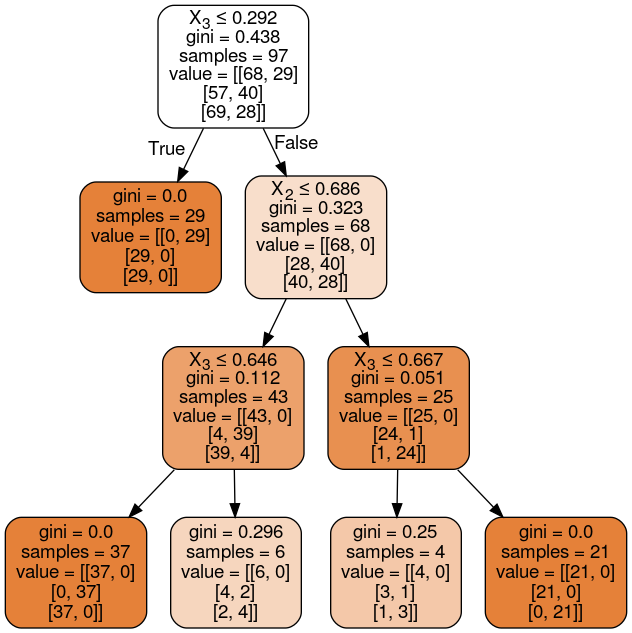

In [14]:
"""The ‘value’ row in each node tells us how many of the observations that 
were sorted into that node fall into each of our three categories."""
vob.dtree_visual(treeClf)